In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
CELL_TYPE="beta.uprhi"

In [193]:
all_modules = pd.read_csv("network_construction/allcells_allgenes_ND_25neighbors_modules.tsv", sep="\t")
celltype_modules = pd.read_csv(f"network_construction/{CELL_TYPE}cells_allgenes_ND_25neighbors_modules.tsv", sep="\t")

In [194]:
all_celltype_modules_kmes = all_modules[all_modules.columns[all_modules.columns.str.contains("kME_all")]]
celltype_modules_kmes = celltype_modules[celltype_modules.columns[celltype_modules.columns.str.contains(f"kME_{CELL_TYPE}")]]

In [195]:
shared_genes = set.intersection(set(all_modules.index), set(celltype_modules.index))
all_celltype_modules_kmes_shared = all_celltype_modules_kmes.loc[shared_genes]
celltype_modules_kmes_shared = celltype_modules_kmes.loc[shared_genes]

In [196]:
np.all(all_celltype_modules_kmes_shared.index == celltype_modules_kmes_shared.index)

True

In [197]:
all_celltype_modules_kmes.isna().sum()

kME_allcells_ND_25neighbors-M1     0
kME_allcells_ND_25neighbors-M2     0
kME_allcells_ND_25neighbors-M3     0
kME_allcells_ND_25neighbors-M4     0
kME_allcells_ND_25neighbors-M5     0
kME_allcells_ND_25neighbors-M6     0
kME_allcells_ND_25neighbors-M7     0
kME_allcells_ND_25neighbors-M8     0
kME_allcells_ND_25neighbors-M9     0
kME_allcells_ND_25neighbors-M10    0
dtype: int64

In [198]:
celltype_modules_kmes_shared.isna().sum()

kME_beta.uprhicells_allgenes_ND_25neighbors-M1    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M2    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M3    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M4    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M5    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M6    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M7    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M8    0
dtype: int64

In [199]:
concat_df = pd.concat([all_celltype_modules_kmes_shared, celltype_modules_kmes_shared], axis=1)

In [200]:
concat_df.columns

Index(['kME_allcells_ND_25neighbors-M1', 'kME_allcells_ND_25neighbors-M2',
       'kME_allcells_ND_25neighbors-M3', 'kME_allcells_ND_25neighbors-M4',
       'kME_allcells_ND_25neighbors-M5', 'kME_allcells_ND_25neighbors-M6',
       'kME_allcells_ND_25neighbors-M7', 'kME_allcells_ND_25neighbors-M8',
       'kME_allcells_ND_25neighbors-M9', 'kME_allcells_ND_25neighbors-M10',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M1',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M2',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M3',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M4',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M5',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M6',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M7',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M8'],
      dtype='object')

In [201]:
focus_cols = celltype_modules.columns[celltype_modules.columns.str.contains(f"kME_{CELL_TYPE}")]
corr_df = concat_df.corr().filter(focus_cols).drop(focus_cols)

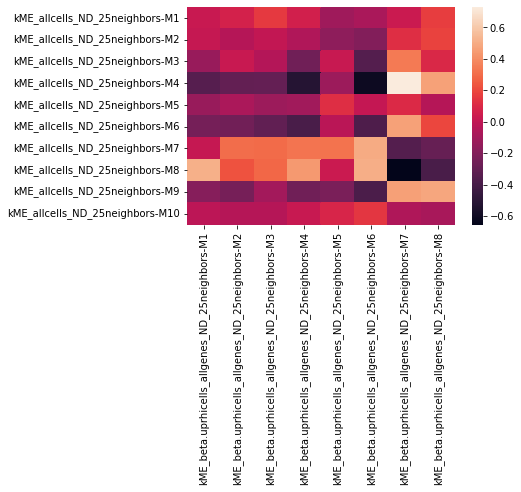

In [202]:
sns.heatmap(corr_df)

In [203]:
all_modules_groupby = all_modules.groupby("module")
celltype_modules_groupby = celltype_modules.groupby("module")

In [204]:
intersections = []
for all_module, all_modules_group in all_modules_groupby:
    if all_module == "grey":
        continue
    genes_in_all_modules = all_modules_group.index
    for celltype_module, celltype_modules_group in celltype_modules_groupby:
        if celltype_module == "grey":
            continue
        genes_in_apha_modules = celltype_modules_group.index
        intersection = set.intersection(set(genes_in_all_modules), set(genes_in_apha_modules))
        intersections.append([all_module, celltype_module, len(intersection)])

In [205]:
shared_df = pd.DataFrame(data=intersections, columns=["allcells_module", f"{CELL_TYPE}cells_module", "num_shared"])

In [206]:
shared_df = shared_df.set_index(["allcells_module", f"{CELL_TYPE}cells_module"]).iloc[:25]

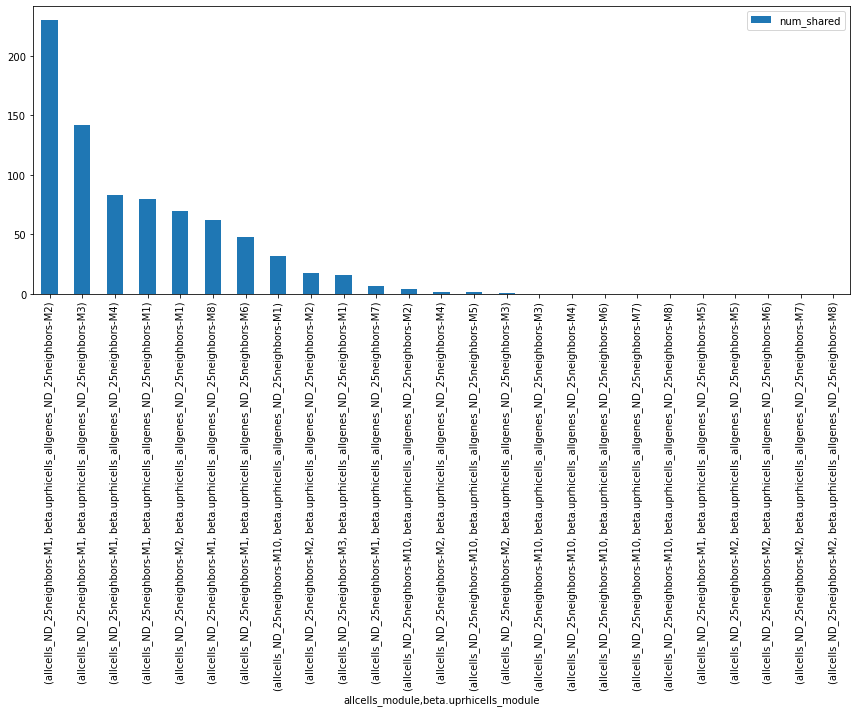

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
shared_df.sort_values("num_shared", ascending=False).plot(kind="bar", ax=ax)
plt.tight_layout()